<a href="https://colab.research.google.com/github/joaopaulof19/Predicao_Transacoes_Fraudulentas/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
# **Detecção de Fraudes em Cartões de Crédito** 💳



***
***
Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Para se ter uma ideia, 2,8 milhões de tentativas de fraudes em cartões de crédito ocorreram apenas no primeiro semestre do ano de 2022. Número de golpes é 8% maior em comparação ao mesmo período de 2021. É estimado que cerca de 1/3 dos brasileiros já foram vítimas de fraude com cartão de crédito, segundo pesquisas da <a href="https://itforum.com.br/noticias/um-terco-dos-brasileiros-ja-foi-vitima-de-fraude-com-cartao-de-credito-diz-ibm/">IBM</a>.


Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/5677/5677024.png" width="30%"></p>

Essas fraudes envolvendo cartões de crédito são de grande relevância, uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais(ou qualquer outra moeda 💵). E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

***
***
## **Importando os Dados** <img src="https://cdn-icons-png.flaticon.com/512/6079/6079229.png" width="3%">
***
***
O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) responde por 0.173% de todas as transações. 


Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança. Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/7562/7562797.png" width="30%"></p>



[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$. As únicas características que não foram transformadas com PCA são 'Time' e 'Amount', além de também nossa variável alvo 'Class'.

  

*   O recurso 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
*   O recurso 'Amount' é o valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. 
*   A característica 'Class' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.
 
 


In [ ]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier



In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

***
***
## **Análise Exploratória** 📊📈 
***
***


Para iniciar, vamos verificar o formato dos dados que vamo trabalhar. Outra coisa que é importante. é verificarmos se nossa base de dados contém valores ausentes para fazer o devido tratamento para não prejudicar nossa análise e nem nosso treinamento. Como podemos ver, nenhum dado faltante 🙂

In [ ]:
# 5 primeiras entradas
display(df.head())
# verificação de nulos
print(df.isnull().sum())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Mãos a obra, vamos checar nosso resumo estatístico. Como podemos verificar, a média das transações realizadas é de cerca de *💲88*, e sua maior transação foi registrada no valor de *💲25691* 💸 

In [ ]:
# resumo estatistico 
df[['Time', 'Amount' ]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Segundo as estatísticas, a classe majoritária é a de transações normais, onde ocorre em *284315* das *284807* registradas no nosso dataset. Temos um dataset extremamente desbalanceado. Poderemos verificar com o gráfico abaixo a dimensão do desbalanceamento.

In [ ]:
df['Class'].astype('object').describe()


count     284807
unique         2
top            0
freq      284315
Name: Class, dtype: int64


Fraudes representam 0.173% do dataset.



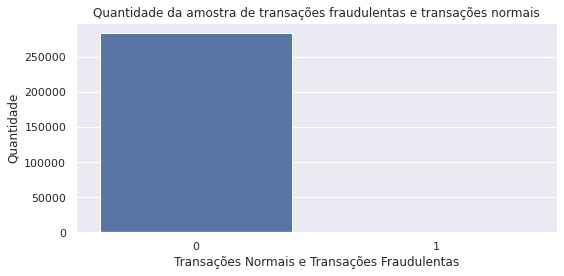

In [ ]:
print("\nFraudes representam {:.3f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))
# Gráfico de barras para ver o balanceamento do dataset

sns.set()
x_transacoes_fraude = df.Class.value_counts().index
y_transacoes_fraude = df.Class.value_counts().values

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x=x_transacoes_fraude, y=y_transacoes_fraude)

ax.set_title('Quantidade da amostra de transações fraudulentas e transações normais')
ax.set_xlabel('Transações Normais e Transações Fraudulentas')
ax.set_ylabel('Quantidade')

plt.tight_layout();

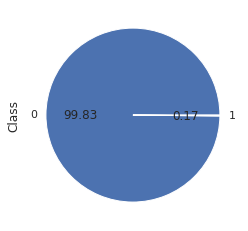

In [ ]:
df['Class'].value_counts().plot.pie(autopct='%.2f');

Nossa! 😱
Esse dataset realmente está desbalanceado! Nem conseguimos visualizar a classe 1 que representa as transações fraudulentas. Como calculamos, as fraudes representam 0.173% do dataset

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (Time). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

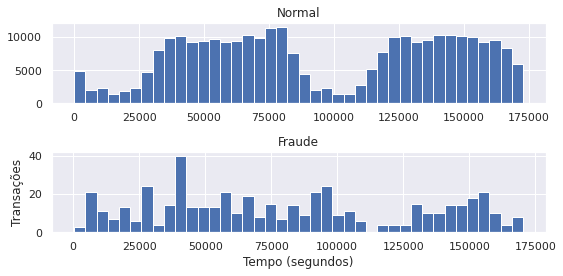

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)

ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Seguindo a análise exploratória, plotou-se os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão Amount.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá nos ajudar para o treinamento do modelo de machine learning.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


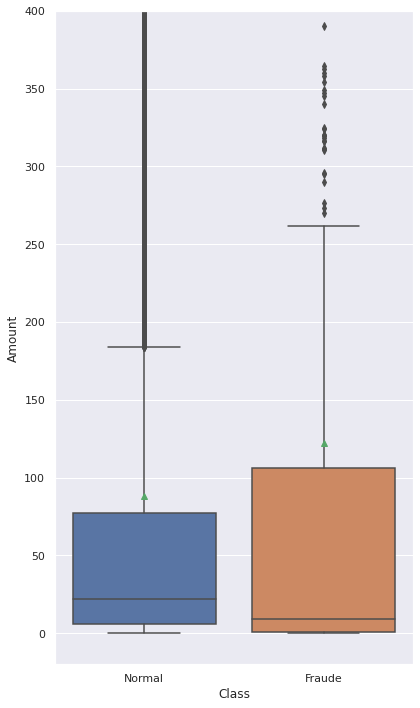

In [ ]:
# Plotar um boxplot para a variável Amount quando houve fraude (Class == 1)
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

As informações estatísticas para `df.Class == 1` mostram que a sua média exata está em 122.21 e a mediana em 9.25.

In [ ]:
df[(df.Class == 1)]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Foi plotado uma matriz de correlação afim de verificar as variáveis que possuem maiores correlações entre si. Vale a pena ressaltar algumas variáveis que possuem uma maior correlação com a nossa variável alvo 'Class', que podem ser correlacionadas positivamente(como a v2, v4 e v11) e também negativamente(como v7, v10, v12, v14, v16 e v17)

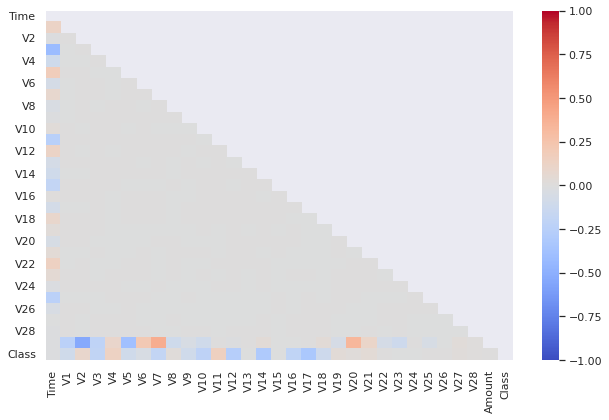

In [ ]:
mask = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', mask=mask)

plt.tight_layout()

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no *dataframe*.


***
***
## **Preparação dos Dados** <img src="https://cdn-icons-png.flaticon.com/512/2644/2644373.png" width="3%">
***
***


Agora vamos preparar nossos dados para que eles tenham o formato correto para o algorítimo de machine learning consiga entender. Primeiramente vamos separar a variável alvo(que queremos prever) das demais, que chamamos de variáveis preditivas.

In [ ]:
# definindo nosso X e nosso y(variável alvo)
y= df['Class']
X_full = df.drop(['Class'], axis=1, inplace=False)


Agora, vamos separar os dados de treino e os dados de teste. Para isso, usei a função train_test_split da biblioteca scikit-learn, uma das mais famosas no ambito de Machine Learning. Separando a base de treino e de teste, configurei o test size em 25%, ou seja, 75% do dataset será utilizado para o algorítimo aprender e 25% para testar o quão esse algorítimo aprendeu de fato.

In [ ]:
# Fazendo separação dos dados de treino e dos dados de teste
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, 
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
y_train.value_counts()/ y_train.shape[0]
y_train.value_counts()

0    213236
1       369
Name: Class, dtype: int64

Porém, como o dataset está desbalanceado, há uma tendência que o algorítimo aprenda mais sobre a classe majoritária que a classe minoritária. Isso, consequentemente, fará com que a classe majoritária tenha uma excelente acurácia, e a classe minoritária tenha uma acurácia bem ruim, tendendo a prever erroneamente a classe que possui mais amostras. No nosso caso, iria acontecer de que muitas transações fraudulentas irial ser previstas como transações normais, acarretando prejuízos para a instituição financeira.

Para resolver isso, vamos usar a técnica de *undersampling*, que consiste em pegar amostras aleatórias da classe majoritária e igualar em número a classe minoritária. Para isso, usamos a classe *RandomUnderSampler* do pacote *imbalanced-learn*.


In [ ]:
# Definindo o UnderSamplere e aplicando para o x e o y de treino
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(y_res.value_counts())

0    369
1    369
Name: Class, dtype: int64


Vale a pena ressaltar, esses dados que usamos o undersampling, será utilizado apenas para treinar nosso modelo, mas na hora de validar, usaremos os dados de validação normal. Se utilizarmos esses mesmos dados agora balanceados para fazer a validação, estaremos distorcendo a realidade, pois na vida real acontece bem mais transações normais do que transações fraudulentas, e isso acarretaria numa má validação do nosso modelo. Isso poderia acarretar prejuízo enorme. 

***
***
## **Modelo de Machine Learning** <img src="https://cdn-icons-png.flaticon.com/512/3273/3273713.png" width="3%">
***
***


Decidi testar 4 algorítimo bem conhecidos em problemas de classificação.



*   Random Forest
*   SVC linear
*   XGBoost

Vamos realizar o pipeline de cada modelo, onde primeiro fazemos o dimensionamento dos dados com o StandardScaler(), assim deixando todas as colunas na mesma escala. Após isso fazemos o fit(ajuste) com o algorítimo que escolhemos, e fazemos a predição com os dados de teste.

### Random Forest

In [ ]:
# Criar um objeto de pipeline para o modelo Random Forest
pipeline_random_forest = Pipeline([
     ('scaler', StandardScaler()),       
     ('Random Forest', RandomForestClassifier(
         
     ))         
])

# Ajuste(fit) com X_res e y_res
pipeline_random_forest.fit(X_res, y_res)


# Obter previsões para X_test e armazenar em y_pred
y_pred_randomForest = pipeline_random_forest.predict(X_test)

### SVM

In [ ]:
# Criar um objeto de pipeline para o modelo SVM
pipeline_svc = Pipeline([
     ('scaler',StandardScaler()),        
     ('SVC', SVC(kernel = 'linear'))         
])

# Ajuste(fit) com X_res e y_res
pipeline_svc.fit(X_res, y_res)


# Obter previsões para X_test e armazenar em y_pred
y_pred_SVC = pipeline_svc.predict(X_test)

### XGBoost 

In [ ]:

# Criar um objeto de pipeline para o modelo XGBoost
pipeline_xgboost = Pipeline([
     ('scaler',StandardScaler()),        
     ('xgboost', XGBClassifier(
     ))         
])

# Ajuste(fit) com X_res e y_res
pipeline_xgboost.fit(X_res, y_res)


# Obter previsões para X_test e armazenar em y_pred
y_pred_xgboost = pipeline_xgboost.predict(X_test)

***
***
## **Avaliar o desempenho do modelo** <img src="https://cdn-icons-png.flaticon.com/512/1721/1721929.png" width="3%">
***
***

**Random Forest**

Relatório de Classificação Random Forest:
               precision    recall  f1-score   support

           0     0.9998    0.9773    0.9884     71079
           1     0.0632    0.8862    0.1180       123

    accuracy                         0.9771     71202
   macro avg     0.5315    0.9317    0.5532     71202
weighted avg     0.9982    0.9771    0.9869     71202

Acurácia Random Forest: 0.9771

AUC Random Forest: 0.9317



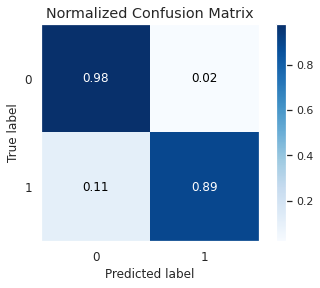

In [ ]:
# plotar a matrix de confusão Random Forest
skplt.metrics.plot_confusion_matrix(y_test, y_pred_randomForest, normalize=True)


# imprimir relatório de classificação
print("Relatório de Classificação Random Forest:\n", classification_report(y_test, y_pred_randomForest, digits=4))

# imprimir a acurácia do modelo
print("Acurácia Random Forest: {:.4f}\n".format(accuracy_score(y_test, y_pred_randomForest)))

# imprimir a área sob da curva
print("AUC Random Forest: {:.4f}\n".format(roc_auc_score(y_test, y_pred_randomForest)))

**SVC**

Relatório de Classificação SVC:
               precision    recall  f1-score   support

           0     0.9998    0.9678    0.9835     71079
           1     0.0462    0.9024    0.0880       123

    accuracy                         0.9677     71202
   macro avg     0.5230    0.9351    0.5357     71202
weighted avg     0.9982    0.9677    0.9820     71202

Acurácia SVC: 0.9677

AUC SVC: 0.9351



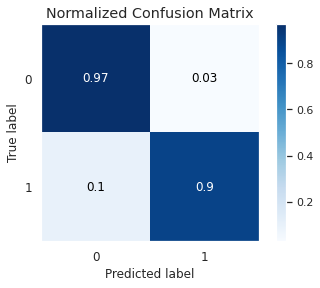

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_SVC, normalize=True)


# imprimir relatório de classificação
print("Relatório de Classificação SVC:\n", classification_report(y_test, y_pred_SVC, digits=4))

# imprimir a acurácia do modelo
print("Acurácia SVC: {:.4f}\n".format(accuracy_score(y_test, y_pred_SVC)))

# imprimir a área sob da curva
print("AUC SVC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_SVC)))

**XGBoost**

Relatório de Classificação XGBoost:
               precision    recall  f1-score   support

           0     0.9999    0.9556    0.9772     71079
           1     0.0345    0.9187    0.0666       123

    accuracy                         0.9555     71202
   macro avg     0.5172    0.9371    0.5219     71202
weighted avg     0.9982    0.9555    0.9756     71202

Acurácia XGBoost: 0.9555

AUC XGBoost: 0.9371



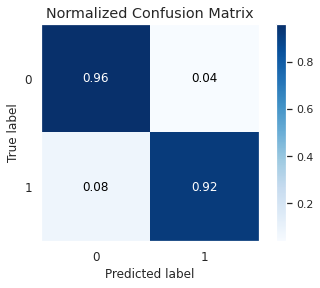

In [ ]:
# plotar a matrix de confusão XGBoost
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgboost, normalize=True)


# imprimir relatório de classificação
print("Relatório de Classificação XGBoost:\n", classification_report(y_test, y_pred_xgboost, digits=4))

# imprimir a acurácia do modelo
print("Acurácia XGBoost: {:.4f}\n".format(accuracy_score(y_test, y_pred_xgboost)))

# imprimir a área sob da curva
print("AUC XGBoost: {:.4f}\n".format(roc_auc_score(y_test, y_pred_xgboost)))

***
***
## **Conclusão** <img src="https://cdn-icons-png.flaticon.com/512/6863/6863897.png" width="3%">
***
***



Além da acurácia, achamos relevante analizar a AUC(Area Under the Curve) do modelo. O AUC varia entre 0 e 1 e quanto maior o AUC melhor o modelo. 

AUC é uma métrica melhor para casos em que as classes são bastante desbalanceadas, e sua principal vantagem é poder escolher o melhor ponto de corte para otimizar o desempenho do modelo.


* Apesar do modelo Random ter tido a melhor acurácia, teve o pior desempenho nas transações fraudulentas.
* Já o modelo XGBoost teve a melhor performance com as transações fraudulentas, porém, o pior desempenho para as transações normais e pior desempenho na acurácia geral. 

Para a escolha do modelo, eu iria de XGBoost, visto que ele tem a melhor métrica de AUC, indicando que no contexto geral, é o que se sai melhor em relação ao equilíbrio de ambas as classes.